# Research Skills: Image Analysis 
## Take-home Assignment - Part 1 
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Academic Year 2021-2022

Your First Name: Nhi

Your Last Name: Tran

Your Student ID: 2077737

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

## Part 1: Image smoothing in the spatial and frequency domain

1. (5 points) Read in the color image you have been provided.  Convert the image to grayscale. Display the image with a grayscale colormap and an appropriate title. 

Points breakdown: 3 points for converting the color image to gray, 2 points for displaying your image.

(-0.5, 1399.5, 1049.5, -0.5)

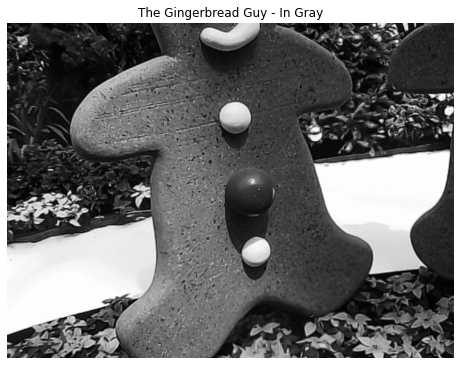

In [1]:
#Your code goes here 
from skimage import io, color
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline 
# Convert the color image to grayscale  
im_original = io.imread('2077737/2077737_rgbimage.jpg')
im_gray = color.rgb2gray(im_original)
# Display the image with a gray colormap and an appropriate title
plt.figure(figsize=(8,8))
plt.imshow(im_gray, cmap = 'gray'); plt.title('The Gingerbread Guy - In Gray'); plt.axis('off')

2. (5 points) Add 10\% salt and pepper noise to the grayscale image.

Text(0.5, 1.0, 'Image with 10% salt and pepper noise')

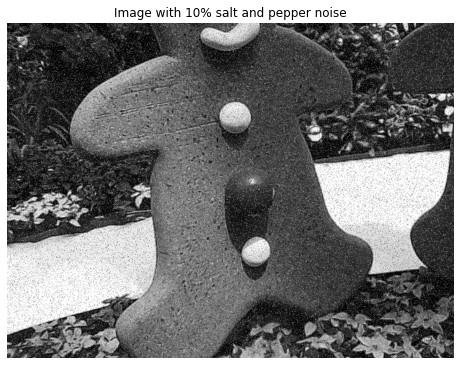

In [2]:
#Your code goes here 
from skimage.util import random_noise, img_as_float
# Set seed
seed = 42
# Add 10% salt and pepper noise to the image
im_noisy_sp = random_noise(im_gray, seed=seed, mode='s&p', amount=0.10)
# Display the s&p noised image
plt.figure(figsize=(8,8))
plt.imshow(im_noisy_sp, cmap='gray'), plt.axis('off')
plt.title('Image with 10% salt and pepper noise')

3. (5 points) Denoise the noisy image by performing a Gaussian blur with `sigma=1` in the spatial domain. Display your denoised image.  

Points breakdown: 3 points for denosing the image, 2 points for displaying your image.

Text(0.5, 1.0, 'Convolved with Gaussian Filter')

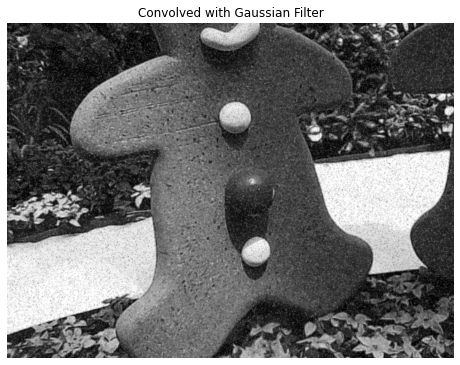

In [8]:
#Your code goes here 
import scipy.ndimage.filters
# Denoise the noisy image by performing a Gaussian blur with sigma = 1 in the spatial domain
gaussFilterImage = scipy.ndimage.gaussian_filter(im_noisy_sp, sigma=1)
# Display the denoised image
plt.figure(figsize=(8,8))
plt.imshow(gaussFilterImage, cmap='gray'), plt.axis('off')
plt.title('Convolved with Gaussian Filter')

4. (5 points) Convert the noisy image (from Q2) to the frequency domain and display the FFT spectrum (FFT magnitude) 

Points breakdown: 2 points for converting to the frequency domain, 3 point for displaying the FFT
spectrum.

(<matplotlib.image.AxesImage at 0x20761203760>, Text(0.5, 1.0, 'FFT spectrum'))

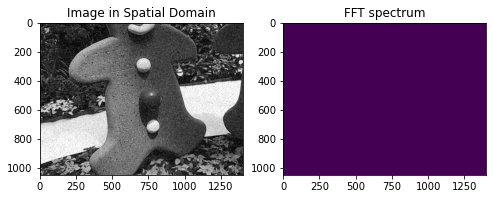

In [13]:
#Your code goes here 
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from skimage import io 

%matplotlib inline

# Convert the noisy image to the frequency domain
im_freq = fftn(im_noisy_sp)

S = abs(im_freq) #magnitude 

plt.figure(figsize=(8,8)) #plot figure
# Display image in spatial domain
plt.subplot(2,2,1)
plt.imshow(im_noisy_sp,cmap='gray'), plt.title('Image in Spatial Domain')
# Display FFT spectrum (FFT magnitude) of the image
plt.subplot(2,2,2), 
plt.imshow(S), plt.title('FFT spectrum') 

5. (5 points) Denoise the noisy image in frequency space by performing a Gaussian blur with `sigma=1` in the frequency domain. Convert your denoised solution back to the spatial domain. Display your denoised image. 

Points breakdown: 2 points for denoising. 2 points for converting your solution to the spatial domain,
1 point for displaying the image.

(Text(0.5, 1.0, 'Denoised Image Spectrum'), (-0.5, 1399.5, 1049.5, -0.5))

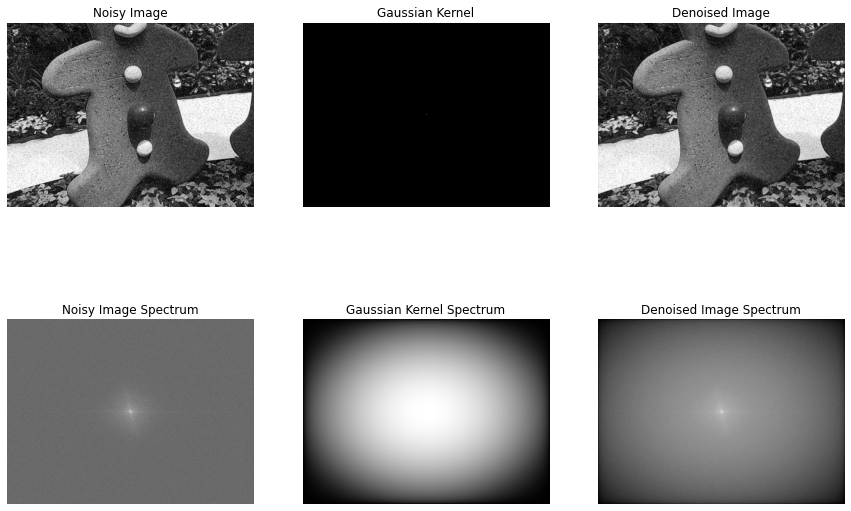

In [16]:
from scipy import signal
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
#from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%matplotlib inline

# Create a gaussian kernel with sigma of 1 
gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], 1), signal.gaussian(im_freq.shape[1], 1))
freq_kernel = fftn(ifftshift(gauss_kernel))

assert(im_freq.shape == gauss_kernel.shape) # assert the required condition

plt.figure(figsize=(15,10)) # plot a figure with reasonable size

# Display noisy image with its spectrum 
plt.subplot(2,3,1), 
plt.imshow(im_noisy_sp,cmap='gray') 
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(2,3,4), 
plt.imshow(np.real(10*np.log10(0.01 + abs(fftshift(im_freq)))),cmap='gray') 
plt.title('Noisy Image Spectrum'), plt.axis('off')

# Dusplay Gaussian kernel
plt.subplot(2,3,2), 
plt.imshow(gauss_kernel,cmap='gray') 
plt.title('Gaussian Kernel'), plt.axis('off')
plt.subplot(2,3,5), 
plt.imshow(np.real(10*np.log10(0.01 + abs(fftshift(freq_kernel)))),cmap='gray') 
plt.title('Gaussian Kernel Spectrum'), plt.axis('off')

# Gaussian blur operation 
im_freqconvolved = im_freq*freq_kernel
# Convert the denoised solution back to the spatial domain.
im_convolved = ifftn(im_freqconvolved).real 

# Display the denoised image
plt.subplot(2,3,3), 
plt.imshow(im_convolved,cmap='gray') 
plt.title('Denoised Image'), plt.axis('off')

plt.subplot(2,3,6), 
plt.imshow(np.real(10*np.log10(0.01 + abs(fftshift(im_freqconvolved)))),cmap='gray') 
plt.title('Denoised Image Spectrum'), plt.axis('off')

6. (10 points) Compare the time taken to run Gaussian blur operations in the spatial domain vs the frequency domain for the following 6 values of `sigma` - 1,2,4,8,16,32 and 64. Plot the time taken vs sigma for both spatial and frequency domain in the same plot. 

Points breakdown: 3 points for running the operations in the spatial domain. 3 points for running
the operations in the frequency domain. 1 point for the plot.

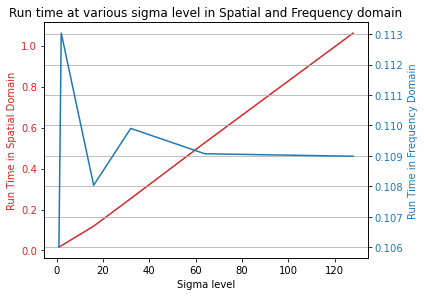

In [27]:
#Your code goes here
# Create a function to extract the time run Gaussian blur operations in the spatial domain
def run_time_GaussianSpatial(image, sigma):
    from scipy.ndimage import gaussian_filter
    import time
    # set start time
    start_time = time.time()
    gaussFilterImage = scipy.ndimage.gaussian_filter(image, sigma)
    # compute the run time
    run_time = (time.time()-start_time)
    return run_time
 
# Create a function looping through different sigma number in the given list 
def sigma_list_Spatial(image, lst): 
    run_time = []
    for i in lst: 
        run_time.append(run_time_GaussianSpatial(image, i))
    return run_time

# Assign the given sigma number to a list
sigma_lst = [1,2,16,32,64,128]

# Run the function to project different run times for each corresponding sigma number
runSpatial = sigma_list_Spatial(im_noisy_sp, sigma_lst)

def run_time_GaussianFreq(image, sigma): 
    from scipy import signal
    from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
    import time
    # set start time
    start_time = time.time()
    # Perform fast Fourier transfrom to convert the data to the frequency domain 
    im_freq = fftn(image)
    # Create a gaussian kernel with sigma of choice 
    gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], sigma), signal.gaussian(im_freq.shape[1], sigma))
    freq_kernel = fftn(ifftshift(gauss_kernel))
    assert(im_freq.shape == gauss_kernel.shape) # assert the threshold requirement
   # Gaussian blur operation 
    im_freqconvolved = im_freq*freq_kernel
    # Convert the denoised solution back to the spatial domain.
    im_convolved = ifftn(im_freqconvolved).real  
    # compute the run time
    run_time = (time.time()-start_time)
    return run_time 

def sigma_list_Freq(image, lst): 
    run_time = []
    for i in lst: 
        run_time.append(run_time_GaussianFreq(image, i))
    return run_time


# Run the function to project different run times for each corresponding sigma number
runFreq = sigma_list_Freq(im_noisy_sp, sigma_lst)

# Plot the time taken vs sigma for both spatial and frequency domain in the same plot
x = sigma_lst
y1 = runSpatial 
y2 = runFreq

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Sigma level')
ax1.set_ylabel('Run Time in Spatial Domain', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Run Time in Frequency Domain', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Run time at various sigma level in Spatial and Frequency domain")
plt.show()


Briefly comment on your plot. When `sigma` is larger, the kernel is larger. Which domain is perfered for for larger kernels? 

Points breakdown: 2 points for your comment on the plot and answering the question.

the larger the sigma the more time it takes to run the operations in spatial domain. Meanwhile in the frequency it is much faster to run the operation and the larger the sigma does not hinder the computation time. 